In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [5]:
import tensorflow as tf
tf.test.gpu_device_name()
# !cat /proc/cpuinfo
# !cat /proc/meminfo


'/device:GPU:0'

In [0]:
import numpy
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from keras.utils import np_utils

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()


class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="train_loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

plot_losses1 = TrainingPlot()


In [11]:
img_width = 28
img_height = 28
first_layer_conv_width = 3
first_layer_conv_height = 3
dense_layer_size = 100
epochs = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

#reshape input data
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels=range(10)

11493376/11490434 [==============================] - 2s 0us/step


In [19]:
# build model
model = Sequential()
model.add(Conv2D(32, (first_layer_conv_width, first_layer_conv_height),input_shape=(28, 28,1),activation='relu'))
model.add(Dropout(.4))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(8, (first_layer_conv_width, first_layer_conv_height),activation='relu'))
# model.add(Dropout(.4))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(dense_layer_size, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               540900    
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

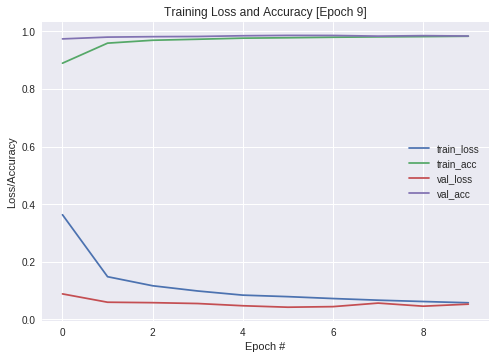

In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[plot_losses1], verbose=1)

**Fashion MNIST Dataset**

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]


#reshape input data
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


X_train = X_train / 255.
X_test = X_test / 255.

num_classes = y_train.shape[1]

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# # create model
# model = Sequential()
# model.add(Flatten(input_shape=(img_width, img_height, 1)))
# model.add(Dense(num_classes, activation="relu"))
# model.add(Dense(num_classes, activation="softmax"))
# model.compile(loss='categorical_crossentropy', optimizer='adam',
#               metrics=['accuracy'])
# model.summary()

# build model
model = Sequential()
model.add(BatchNormalization(input_shape=(img_width, img_height, 1)))
model.add(Conv2D(64, (5, 5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(.25))


model.add(BatchNormalization(input_shape=(img_width, img_height, 1)))
model.add(Conv2D(128, (5, 5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))

# model.add(BatchNormalization(input_shape=(img_width, img_height, 1)))
# model.add(Conv2D(256, (5, 5), padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# model.add(Dropout(.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       20

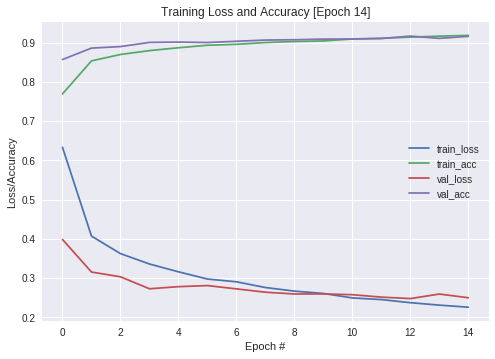

In [6]:
model.fit(X_train, y_train, epochs=15,validation_data=(X_test, y_test), callbacks=[plot_losses1], verbose=1)